In [30]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
#import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [31]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [32]:
data =pd.read_csv('Admission_Prediction.csv')

In [34]:
data.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1      337.0        118.0                4.0  4.5  4.5  9.65   
1           2      324.0        107.0                4.0  4.0  4.5  8.87   
2           3        NaN        104.0                3.0  3.0  3.5  8.00   
3           4      322.0        110.0                3.0  3.5  2.5  8.67   
4           5      314.0        103.0                2.0  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [35]:
data.describe(include='all')

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  485.000000   490.000000         485.000000  500.000000   
mean   250.500000  316.558763   107.187755           3.121649    3.374000   
std    144.481833   11.274704     6.112899           1.146160    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000          0.34000  
25%      3.00000    8.127500    0.000000          0.63000  
50%      3.50000    8.560000    1.000000          0.72000  
75%      4.00000    9.040000    1.000000          0.82000  
max      5.00000    9.920000    1.000000          0.97000

In [45]:
data['University Rating'].mode()[0]

3.0

In [46]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

In [47]:
data['University Rating']

0      4.0
1      4.0
2      3.0
3      3.0
4      2.0
5      5.0
6      3.0
7      2.0
8      1.0
9      3.0
10     3.0
11     4.0
12     4.0
13     3.0
14     3.0
15     3.0
16     3.0
17     3.0
18     3.0
19     3.0
20     3.0
21     4.0
22     5.0
23     5.0
24     5.0
25     5.0
26     5.0
27     2.0
28     1.0
29     2.0
      ... 
470    5.0
471    3.0
472    4.0
473    2.0
474    4.0
475    3.0
476    3.0
477    4.0
478    3.0
479    4.0
480    3.0
481    4.0
482    4.0
483    5.0
484    3.0
485    2.0
486    3.0
487    4.0
488    3.0
489    3.0
490    2.0
491    4.0
492    4.0
493    2.0
494    3.0
495    5.0
496    5.0
497    5.0
498    4.0
499    4.0
Name: University Rating, Length: 500, dtype: float64

In [48]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [49]:
data.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.558763   107.187755           3.118000    3.374000   
std    144.481833   11.103952     6.051338           1.128993    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  309.000000   103.000000           2.000000    2.500000   
50%    250.500000  316.558763   107.000000           3.000000    3.500000   
75%    375.250000  324.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000          0.34000  
25%      3.00000    8.127500    0.000000          0.63000  
50%      3.50000    8.560000    1.000000          0.72000  
75%      4.00000    9.040000    1.000000          0.82000  
max      5.00000    9.920000    1.000000          0.97000

In [50]:
data= data.drop(columns = ['Serial No.'])
data.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0  337.000000        118.0                4.0  4.5  4.5  9.65         1   
1  324.000000        107.0                4.0  4.0  4.5  8.87         1   
2  316.558763        104.0                3.0  3.0  3.5  8.00         1   
3  322.000000        110.0                3.0  3.5  2.5  8.67         1   
4  314.000000        103.0                2.0  2.0  3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

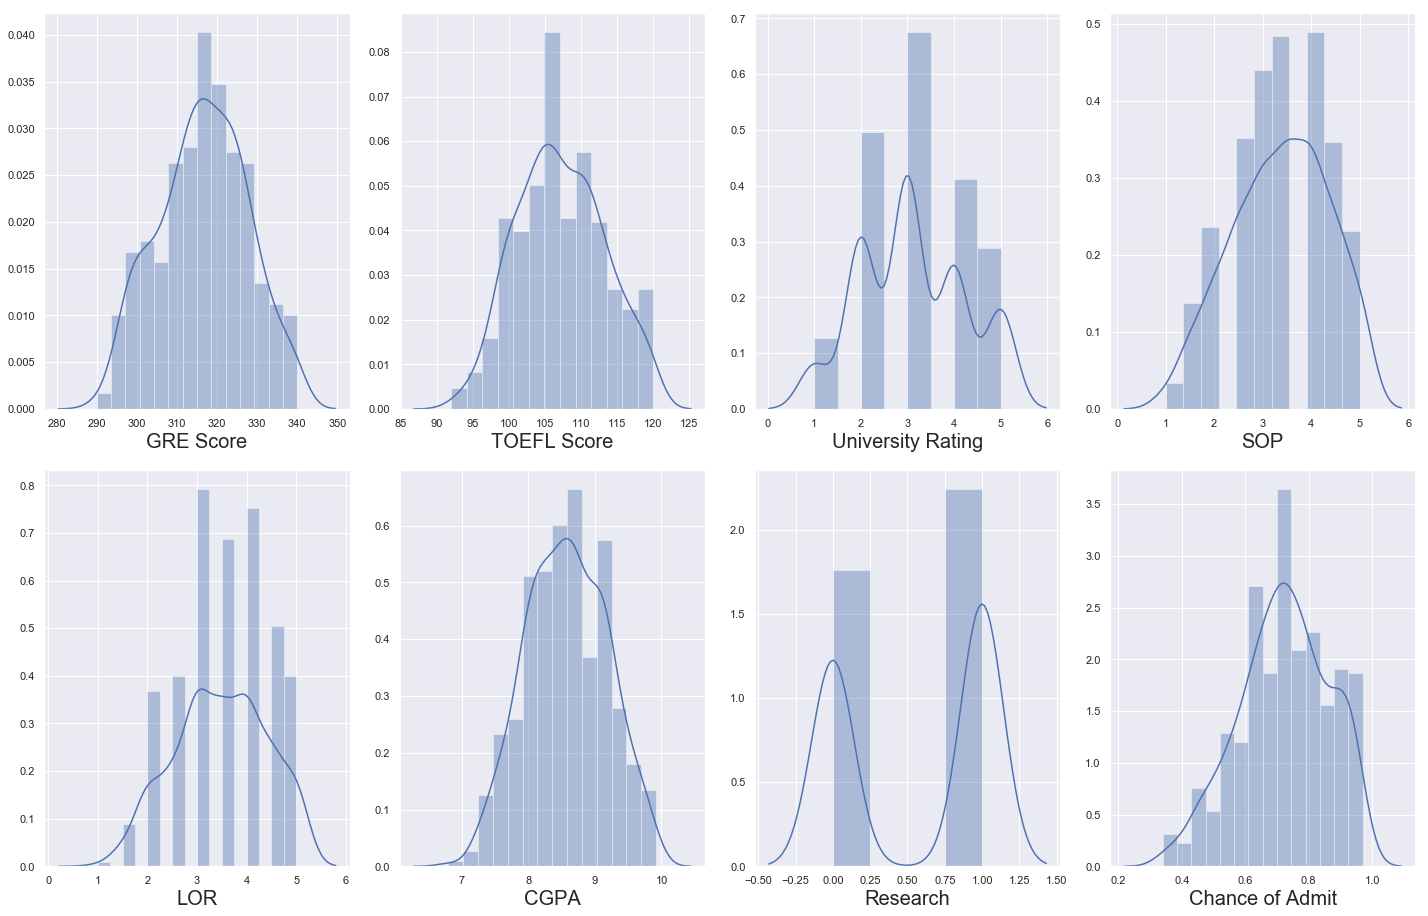

In [51]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [52]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

In [53]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
5      0.90
6      0.75
7      0.68
8      0.50
9      0.45
10     0.52
11     0.84
12     0.78
13     0.62
14     0.61
15     0.54
16     0.66
17     0.65
18     0.63
19     0.62
20     0.64
21     0.70
22     0.94
23     0.95
24     0.97
25     0.94
26     0.76
27     0.44
28     0.46
29     0.54
       ... 
470    0.87
471    0.64
472    0.90
473    0.67
474    0.67
475    0.59
476    0.62
477    0.65
478    0.71
479    0.79
480    0.80
481    0.78
482    0.83
483    0.71
484    0.73
485    0.70
486    0.68
487    0.79
488    0.76
489    0.65
490    0.67
491    0.54
492    0.53
493    0.62
494    0.68
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [54]:
X

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0    337.000000   118.000000                4.0  4.5  4.5  9.65         1
1    324.000000   107.000000                4.0  4.0  4.5  8.87         1
2    316.558763   104.000000                3.0  3.0  3.5  8.00         1
3    322.000000   110.000000                3.0  3.5  2.5  8.67         1
4    314.000000   103.000000                2.0  2.0  3.0  8.21         0
5    330.000000   115.000000                5.0  4.5  3.0  9.34         1
6    321.000000   109.000000                3.0  3.0  4.0  8.20         1
7    308.000000   101.000000                2.0  3.0  4.0  7.90         0
8    302.000000   102.000000                1.0  2.0  1.5  8.00         0
9    323.000000   108.000000                3.0  3.5  3.0  8.60         0
10   325.000000   106.000000                3.0  3.5  4.0  8.40         1
11   327.000000   111.000000                4.0  4.0  4.5  9.00         1
12   316.558763   112.000000                4.0  4.0  4.5  9.10         1
13   307.000000   109.000000                3.0  4.0  3.0  8.00         1
14   311.000000   104.000000                3.0  3.5  2.0  8.20         1
15   314.000000   105.000000                3.0  3.5  2.5  8.30         0
16   317.000000   107.000000                3.0  4.0  3.0  8.70         0
17   319.000000   106.000000                3.0  4.0  3.0  8.00         1
18   318.000000   110.000000                3.0  4.0  3.0  8.80         0
19   303.000000   102.000000                3.0  3.5  3.0  8.50         0
20   312.000000   107.000000                3.0  3.0  2.0  7.90         1
21   325.000000   114.000000                4.0  3.0  2.0  8.40         0
22   328.000000   116.000000                5.0  5.0  5.0  9.50         1
23   316.558763   119.000000                5.0  5.0  4.5  9.70         1
24   336.000000   119.000000                5.0  4.0  3.5  9.80         1
25   340.000000   120.000000                5.0  4.5  4.5  9.60         1
26   322.000000   109.000000                5.0  4.5  3.5  8.80         0
27   298.000000    98.000000                2.0  1.5  2.5  7.50         1
28   295.000000    93.000000                1.0  2.0  2.0  7.20         0
29   310.000000    99.000000                2.0  1.5  2.0  7.30         0
..          ...          ...                ...  ...  ...   ...       ...
470  320.000000   110.000000                5.0  4.0  4.0  9.27         1
471  311.000000   103.000000                3.0  2.0  4.0  8.09         0
472  327.000000   116.000000                4.0  4.0  4.5  9.48         1
473  316.000000   102.000000                2.0  4.0  3.5  8.15         0
474  308.000000   105.000000                4.0  3.0  2.5  7.95         1
475  300.000000   101.000000                3.0  3.5  2.5  7.88         0
476  304.000000   104.000000                3.0  2.5  2.0  8.12         0
477  309.000000   105.000000                4.0  3.5  2.0  8.18         0
478  318.000000   103.000000                3.0  4.0  4.5  8.49         1
479  325.000000   110.000000                4.0  4.5  4.0  8.96         1
480  321.000000   102.000000                3.0  3.5  4.0  9.01         1
481  323.000000   107.000000                4.0  3.0  2.5  8.48         1
482  328.000000   113.000000                4.0  4.0  2.5  8.77         1
483  304.000000   103.000000                5.0  5.0  3.0  7.92         0
484  317.000000   106.000000                3.0  3.5  3.0  7.89         1
485  311.000000   107.187755                2.0  2.5  3.5  8.34         1
486  319.000000   102.000000                3.0  2.5  2.5  8.37         0
487  327.000000   115.000000                4.0  3.5  4.0  9.14         0
488  322.000000   112.000000                3.0  3.0  4.0  8.62         1
489  316.558763   110.000000                3.0  4.0  4.5  8.50         0
490  307.000000   105.000000                2.0  2.5  4.5  8.12         1
491  297.000000    99.000000                4.0  3.0  3.5  7.81         0
492  298.0

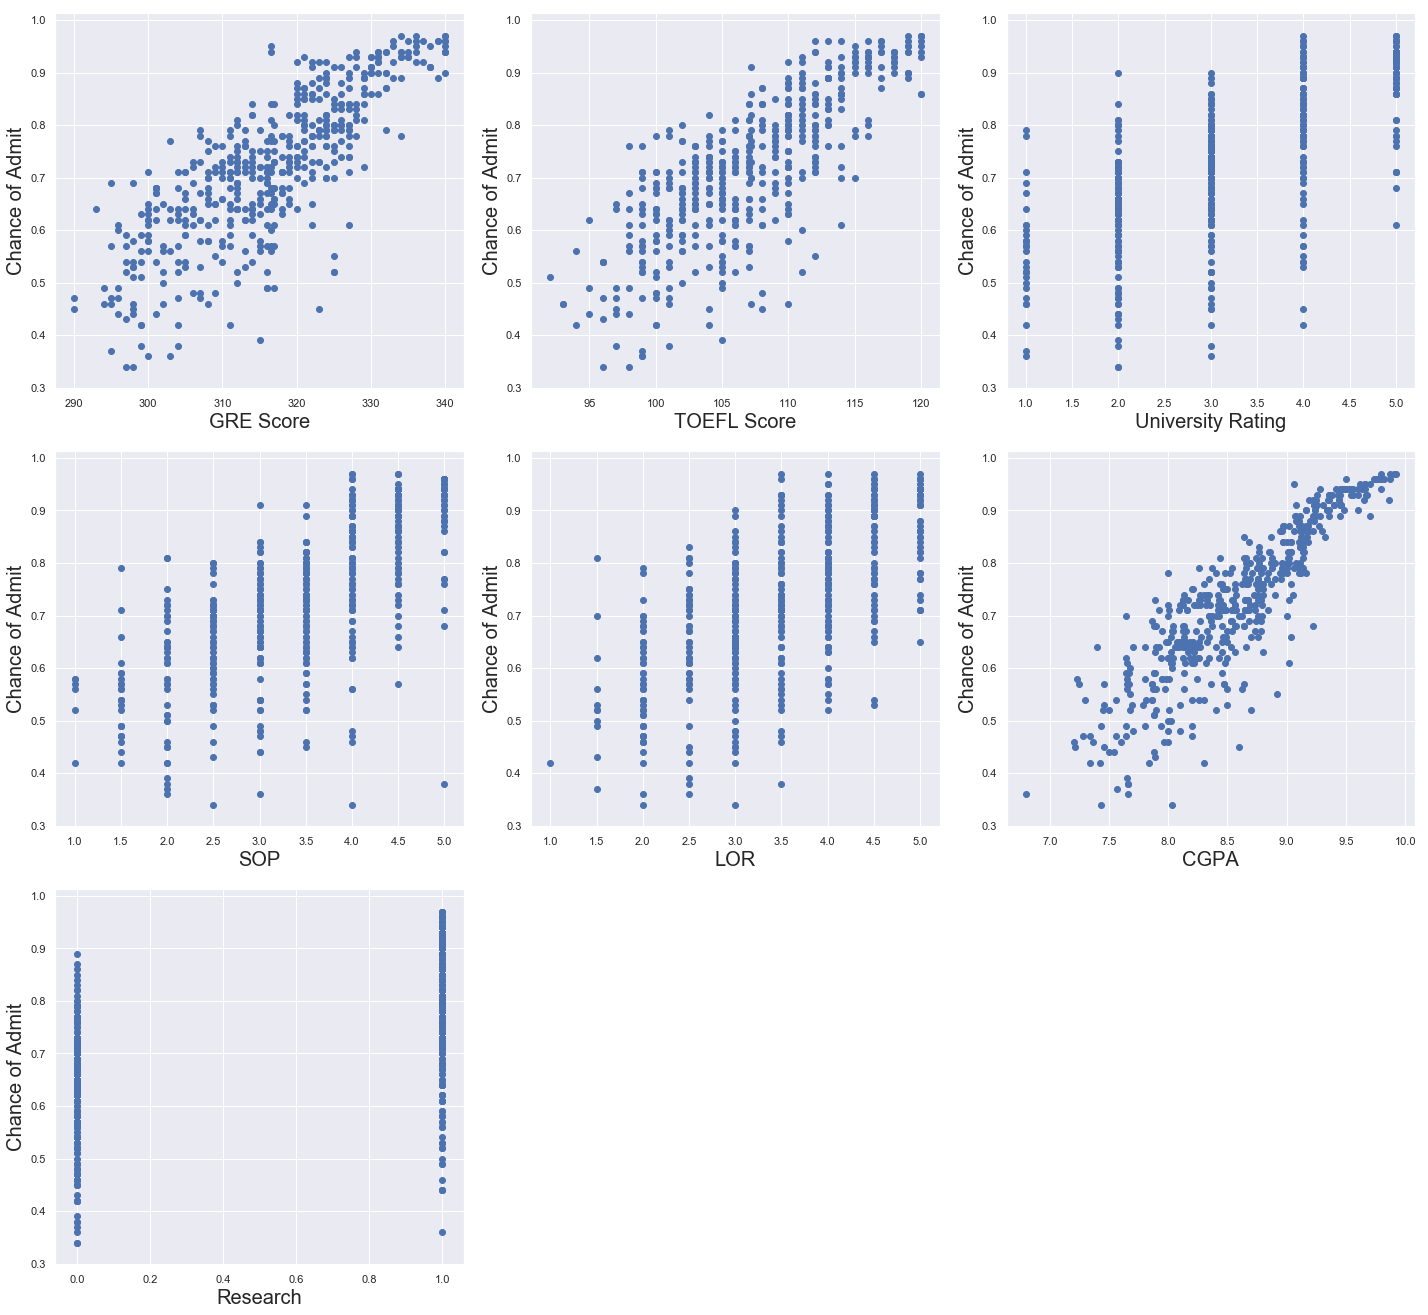

In [55]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [56]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [57]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
variables = X_scaled

In [61]:
vif = pd.DataFrame()

In [62]:
vif

Empty DataFrame
Columns: []
Index: []

In [65]:
variables.shape[1]

7

In [66]:
list(range(7))

[0, 1, 2, 3, 4, 5, 6]

In [67]:
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

In [68]:
vif

VIF
0  4.152735
1  3.793345
2  2.517272
3  2.776393
4  2.037449
5  4.654369
6  1.459411

In [69]:
vif["Features"] = X.columns

In [70]:
vif

VIF           Features
0  4.152735          GRE Score
1  3.793345        TOEFL Score
2  2.517272  University Rating
3  2.776393                SOP
4  2.037449                LOR
5  4.654369               CGPA
6  1.459411           Research

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [72]:
X_train

array([[-0.50111259, -0.69273097, -0.10462259, ...,  0.55812525,
        -0.80508741, -1.12815215],
       [ 0.49051785,  0.29977831,  1.66864169, ...,  0.01730621,
         0.37000522, -1.12815215],
       [-0.77155725, -1.02356739, -0.99125473, ...,  0.55812525,
        -1.11954882, -1.12815215],
       ...,
       [-1.31244657, -1.35440382, -1.87788687, ..., -1.60515091,
        -2.19533785, -1.12815215],
       [-0.68140903, -0.36189454, -0.99125473, ...,  0.55812525,
        -1.48366203, -1.12815215],
       [-0.23066792, -0.19647633, -0.99125473, ...,  0.01730621,
        -0.5402778 , -1.12815215]])

In [73]:
y_train

471    0.64
26     0.76
7      0.68
453    0.73
108    0.93
37     0.58
157    0.65
489    0.65
118    0.47
114    0.59
175    0.85
373    0.79
181    0.71
144    0.80
369    0.67
390    0.64
195    0.78
404    0.62
275    0.78
454    0.71
141    0.90
365    0.86
67     0.57
210    0.79
168    0.64
493    0.62
375    0.38
400    0.63
272    0.49
109    0.68
       ... 
276    0.89
443    0.87
191    0.87
385    0.96
293    0.64
413    0.49
343    0.59
257    0.78
308    0.69
149    0.79
130    0.96
151    0.94
359    0.81
99     0.79
372    0.95
87     0.66
458    0.69
330    0.80
214    0.94
466    0.71
121    0.94
499    0.84
20     0.64
188    0.93
71     0.96
106    0.87
270    0.72
348    0.57
435    0.55
102    0.62
Name: Chance of Admit, Length: 335, dtype: float64

In [74]:
X_test

array([[ 1.5722965 ,  1.4577058 ,  0.78200955, ...,  0.01730621,
         1.59474966,  0.88640526],
       [-0.23066792,  0.1343601 ,  0.78200955, ...,  0.55812525,
         0.76721964,  0.88640526],
       [-0.1405197 , -0.36189454, -0.99125473, ..., -1.06433187,
        -1.53331383, -1.12815215],
       ...,
       [-0.05037148, -0.69273097, -0.99125473, ...,  1.09894429,
         0.27070162, -1.12815215],
       [-0.59126081, -1.35440382, -0.99125473, ..., -1.60515091,
        -2.11258485, -1.12815215],
       [ 0.03977674, -0.19647633, -1.87788687, ...,  0.01730621,
        -1.53331383,  0.88640526]])

In [75]:
y_test

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
394    0.89
377    0.47
124    0.57
68     0.68
450    0.82
9      0.45
194    0.77
406    0.61
84     0.94
371    0.89
388    0.49
495    0.87
30     0.65
316    0.54
408    0.57
490    0.67
491    0.54
280    0.68
356    0.79
76     0.74
461    0.68
497    0.93
211    0.82
101    0.64
334    0.73
       ... 
57     0.46
192    0.86
24     0.97
17     0.65
265    0.71
66     0.61
208    0.64
479    0.79
94     0.36
253    0.93
266    0.72
23     0.95
222    0.76
261    0.71
426    0.71
5      0.90
116    0.56
45     0.88
16     0.66
462    0.62
357    0.68
3      0.80
218    0.84
405    0.52
60     0.48
110    0.61
318    0.79
428    0.69
29     0.54
437    0.61
Name: Chance of Admit, Length: 165, dtype: float64

In [76]:
regression = LinearRegression()

In [77]:
regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
filename = 'finalized_model.pickle'

In [81]:
filename

'finalized_model.pickle'

In [82]:
pickle.dump(regression, open(filename, 'wb'))

In [84]:
pwd

'C:\\Users\\USER\\Desktop\\today\\LRTC\\LinearRegression\\LinearRegressionTillCloud'

In [83]:
import pickle

In [85]:
loaded_model = pickle.load(open(filename, 'rb'))

In [86]:
loaded_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))

In [88]:
a

array([0.91557553])